## Checking results of run02

N. Gosnell July 9, 2018  

We are re-running five orders that showed multimodal distributions. Let's see how they look...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
         "$T_{\mathrm{eff, 2}}$", "$\log{\Omega_2}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"]

### Order 107

In [3]:
ws = np.load("../sf/m107/output/mix_emcee/run02/emcee_chain.npy")

In [4]:
mask = ws[0, :, 0] != 0
mask.sum()

5000

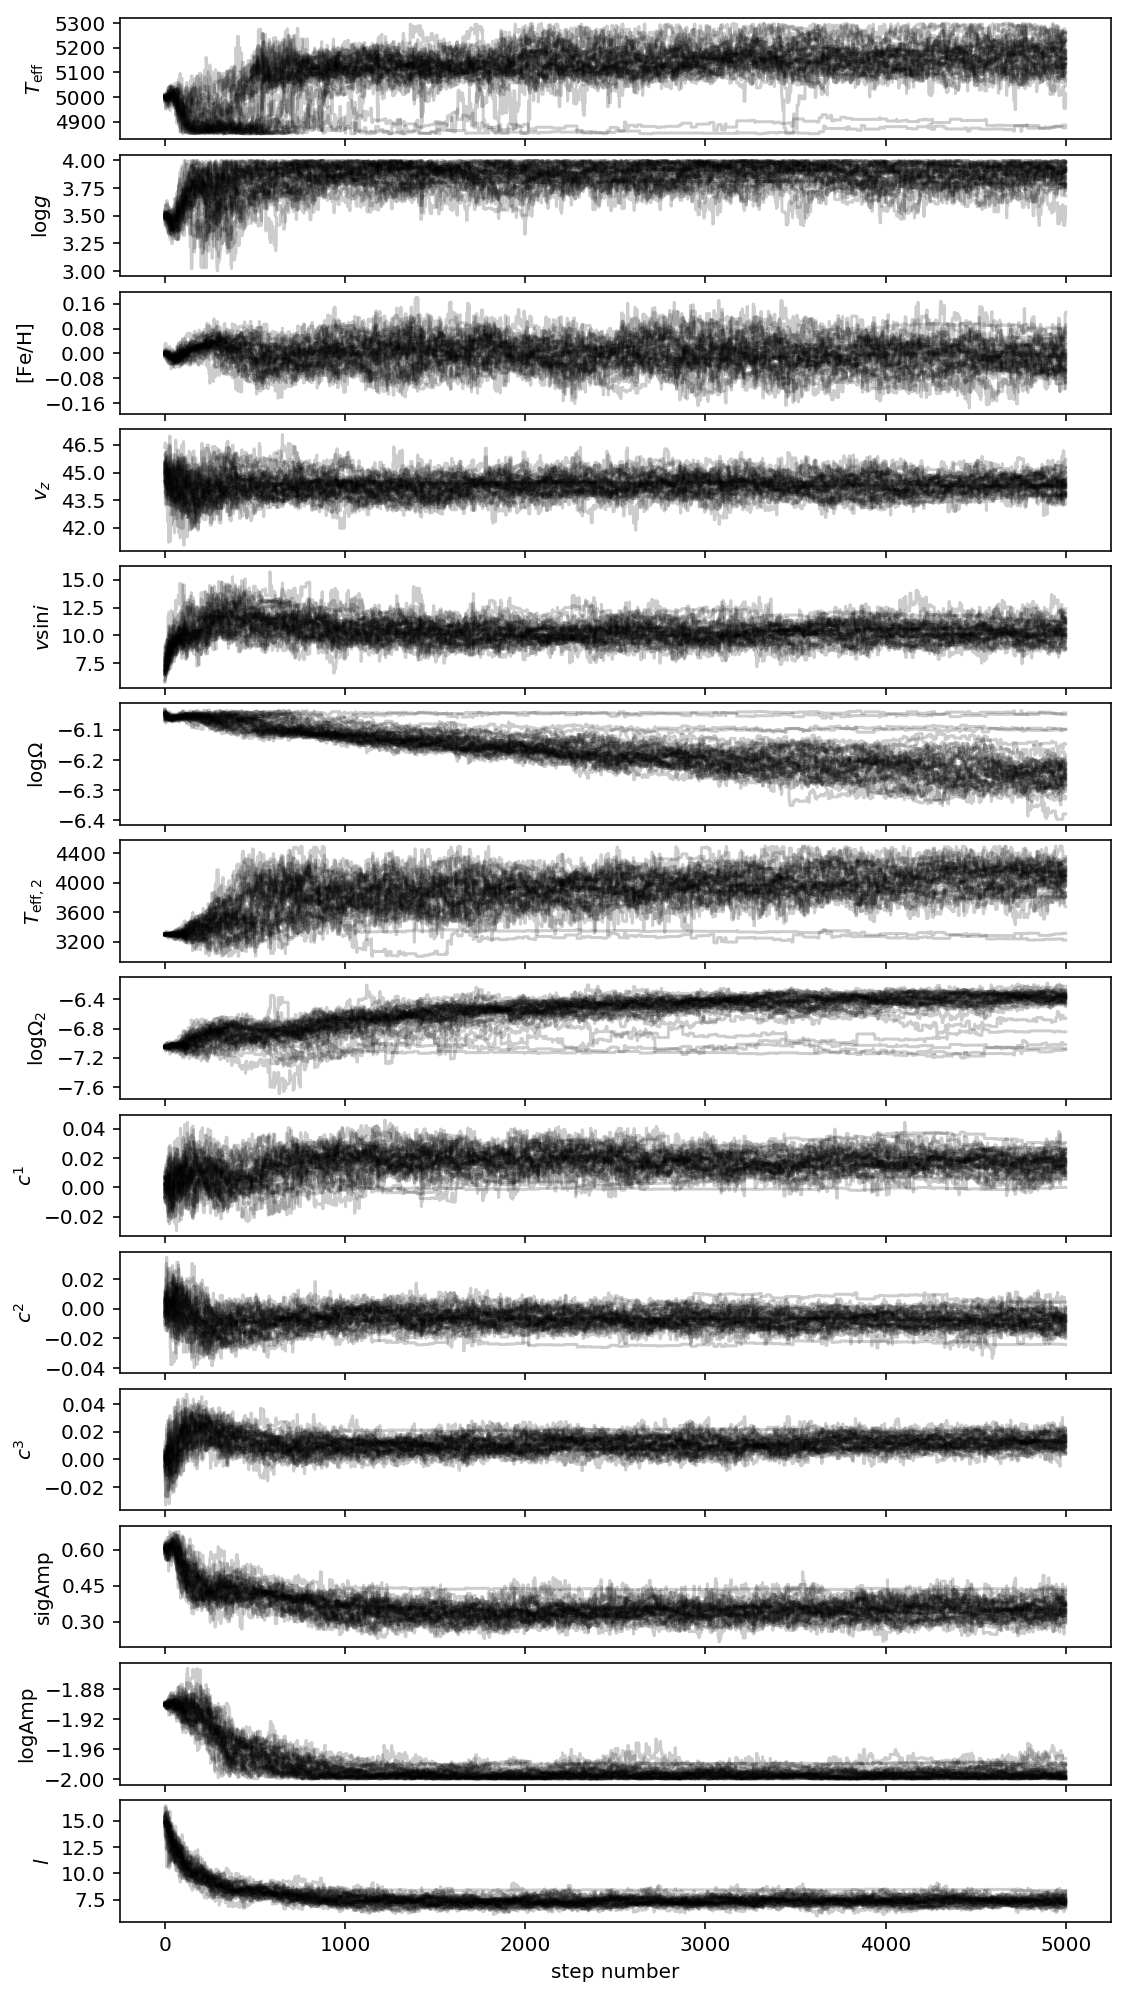

In [5]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
plt.savefig('../results/figs/subsub_m107_run02.png', dpi=300, bbox_inches='tight')

In [6]:
burned = ws[:, 2500:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [7]:
f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])

/Users/ngosnell/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 1.0)

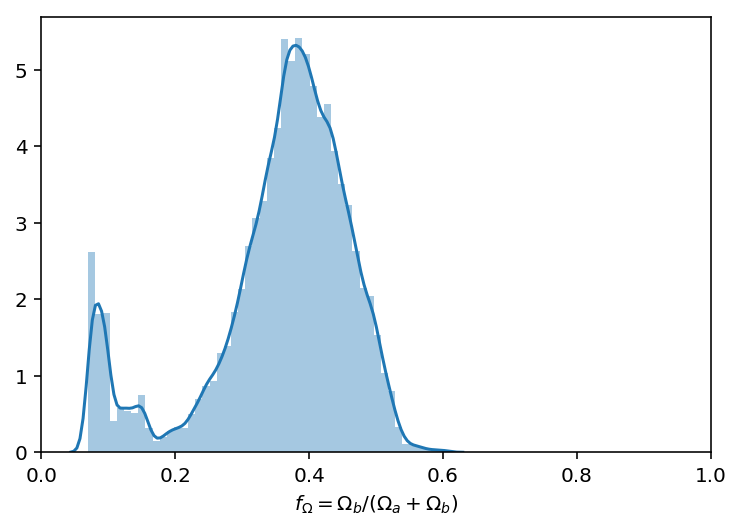

In [10]:
sns.distplot(f_omega)
plt.xlabel('$f_{\Omega} = \Omega_b/(\Omega_a + \Omega_b)$')
plt.xlim(0, 1.0)

Hooray!